In [ ]:
"""
@author: anahí
pip install seaborn
https://scikit-learn.org/stable/modules/tree.html#
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://medium.com/@natalia.benitez/%C3%A1rboles-de-decisi%C3%B3n-usando-python-2b0598698944
https://towardsdatascience.com/master-machine-learning-decision-trees-from-scratch-with-python-de75b0494bcd
"""
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings('ignore')


In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
#%%  CARGAMOS DATASET Y LO CONOCEMOS UN POCO
titanic = sns.load_dataset("titanic")

print(type(titanic))
print(titanic.shape)
print(titanic.columns)
titanic.head()


<class 'pandas.core.frame.DataFrame'>
(891, 15)
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
titanic.isnull().sum().sum()

np.int64(869)

In [ ]:
print(f'Hay datos ausentes? {titanic.isnull().any().any()}')
titanic.info()

Hay datos ausentes? True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic['pclass'].unique()

array([3, 1, 2])

In [ ]:
titanic['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

survived
0    549
1    342
dtype: int64


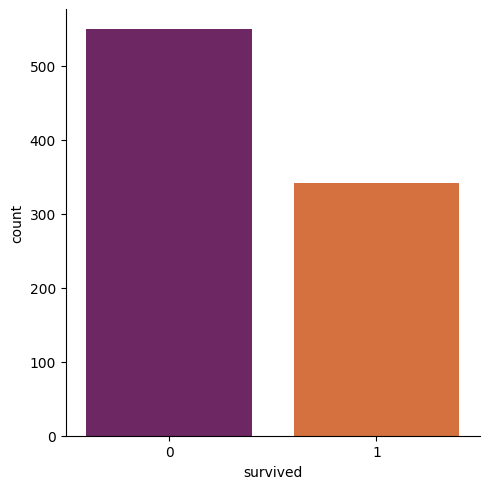

In [ ]:
print(titanic.groupby('survived').size())
sns.catplot(data=titanic, x='survived', kind = "count", palette='inferno')
# 1.5 no, 1 si - »'survived' hay desbalance

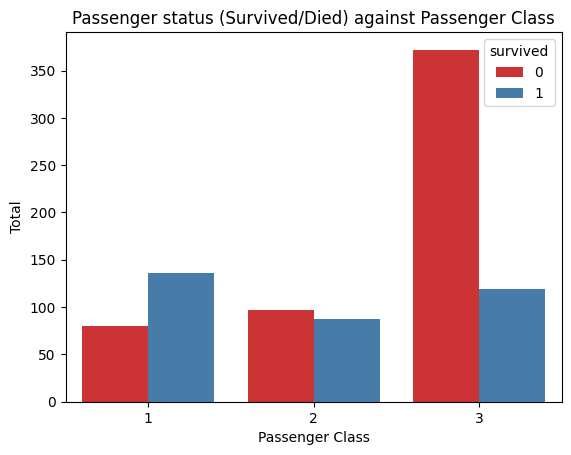

In [ ]:
# https://www.kaggle.com/code/thulani96/titanic-dataset-analysis-with-seaborn

ax = sns.countplot(x = 'pclass', hue = 'survived', palette = 'Set1', data = titanic)
ax.set(title = 'Passenger status (Survived/Died) against Passenger Class',
       xlabel = 'Passenger Class', ylabel = 'Total')
plt.show()

survived    0    1
sex               
female     81  233
male      468  109


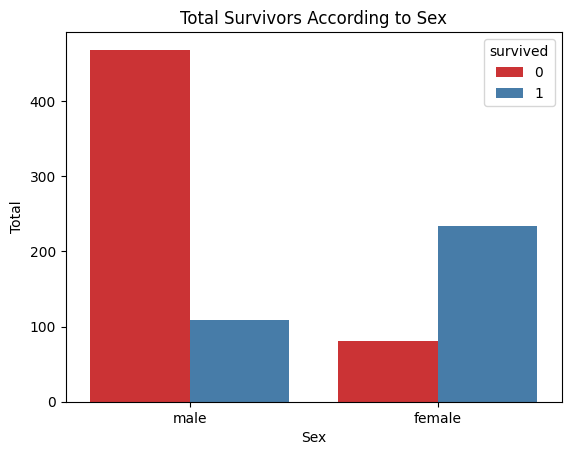

In [ ]:
print(pd.crosstab(titanic["sex"],titanic.survived))
ax = sns.countplot(x = 'sex', hue = 'survived', palette = 'Set1', data = titanic)
ax.set(title = 'Total Survivors According to Sex', xlabel = 'Sex', ylabel='Total')
plt.show()

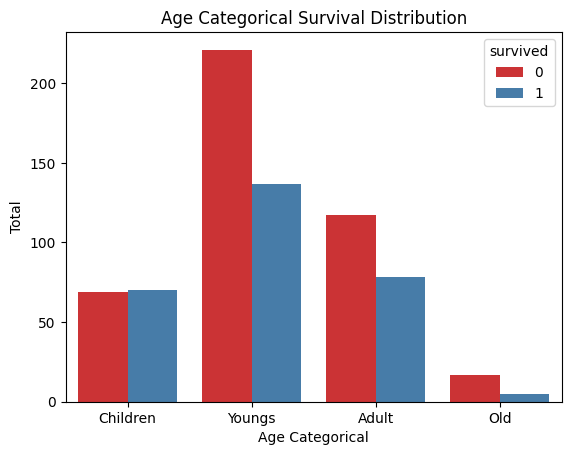

In [ ]:
# We look at Age column and set Intevals on the ages and the map them to their categories as
# (Children, Teen, Adult, Old)
interval = (0,18,35,60,120)
categories = ['Children','Youngs','Adult', 'Old']
titanic['age_cats'] = pd.cut(titanic.age, interval, labels = categories)

ax = sns.countplot(x = 'age_cats',  data = titanic, hue = 'survived', palette = 'Set1')

ax.set(xlabel='Age Categorical', ylabel='Total',
       title="Age Categorical Survival Distribution")

plt.show()


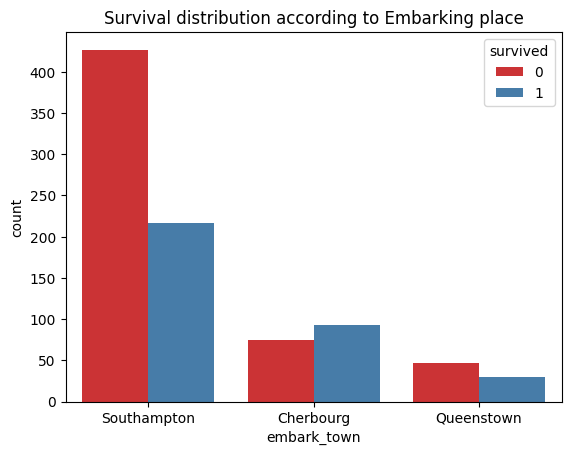

In [ ]:
ax = sns.countplot(x = 'embark_town', hue = 'survived', palette = 'Set1', data = titanic)
ax.set(title = 'Survival distribution according to Embarking place')
plt.show()

In [ ]:
print(pd.crosstab(titanic['embarked'], titanic.survived))

survived    0    1
embarked          
C          75   93
Q          47   30
S         427  217


In [ ]:
#%%  PREPARAMOS LOS DATOS PARA EL MODELO
# asignamos el valor medio a los faltantes de la columna 'age'
titanic['age'] = titanic['age'].fillna(titanic.groupby(['pclass', 'sex'])['age'].transform('mean'))
titanic.info()
# quedaron casi todas las columnas sin NaN, excepto 'deck' que sólo tiene 203 valores no nulos
# esa columna la eliminaremos pues no tiene suficientes datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  age_cats     714 non-null    category
dtypes: bool(2), category(3), float64(2), int64(4), object(5)
memory usage: 81.7+ KB


In [ ]:
titanic['age'].unique()
#print(len(titanic['age'].unique()))

array([22.        , 38.        , 26.        , 35.        , 26.50758893,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 30.74070707,
       31.        , 21.75      , 34.        , 15.        , 28.        ,
        8.        , 19.        , 40.        , 34.61176471, 66.        ,
       42.        , 21.        , 18.        ,  3.        ,  7.        ,
       49.        , 29.        , 65.        , 41.28138614, 28.5       ,
        5.        , 11.        , 45.        , 17.        , 32.        ,
       16.        , 25.        ,  0.83      , 30.        , 33.        ,
       23.        , 24.        , 46.        , 59.        , 71.        ,
       37.        , 47.        , 14.5       , 70.5       , 32.5       ,
       12.        ,  9.        , 36.5       , 51.        , 55.5       ,
       40.5       , 44.        ,  1.        , 61.        , 56.        ,
       50.        , 36.        , 45.5       , 20.5       , 62.  

In [ ]:
edad=titanic[['age','sex','adult_male'] ]
edad

,age,sex,adult_male
0,22.00,male,True
1,38.00,female,False
2,26.00,female,False
3,35.00,female,False
4,35.00,male,True
...,...,...,...
886,27.00,male,True
887,19.00,female,False
888,21.75,female,False
889,26.00,male,True


In [ ]:
# elegimos las características predictoras, eliminamos las redundantes x estar duplicadas
X_not = titanic.drop(['deck', 'alive', 'who', 'embarked', 'pclass','age_cats'], axis=1)
X_not.head()


,survived,sex,age,sibsp,parch,fare,class,adult_male,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,True,Southampton,False
1,1,female,38.0,1,0,71.2833,First,False,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,False,Southampton,True
3,1,female,35.0,1,0,53.1000,First,False,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,True,Southampton,True


In [ ]:
# aplicamos el método de Pandas equivalente a OneHotEncoder sobre class,
# recordar que sólo opera sobre columnas con type= 'object' o 'category'
# pandas.get_dummies(data, prefix=None, prefix_sep=’_’, dummy_na=False,
#                    columns=None, sparse=False, drop_first=False, dtype=None)
X=pd.get_dummies(X_not, prefix_sep='-', dummy_na=False, columns=['class', 'embark_town'])

# aplicamos el Encoder sobre las variables que son 'etiquetables'
le = LabelEncoder()
columns=['sex', 'adult_male', 'alone']
for col in columns:
    X[col] = le.fit_transform(X[col])

print(X.shape)
X.head()

(891, 14)


,survived,sex,age,sibsp,parch,fare,adult_male,alone,class-First,class-Second,class-Third,embark_town-Cherbourg,embark_town-Queenstown,embark_town-Southampton
0,0,1,22.0,1,0,7.2500,1,0,False,False,True,False,False,True
1,1,0,38.0,1,0,71.2833,0,0,True,False,False,True,False,False
2,1,0,26.0,0,0,7.9250,0,1,False,False,True,False,False,True
3,1,0,35.0,1,0,53.1000,0,0,True,False,False,False,False,True
4,0,1,35.0,0,0,8.0500,1,1,False,False,True,False,False,True


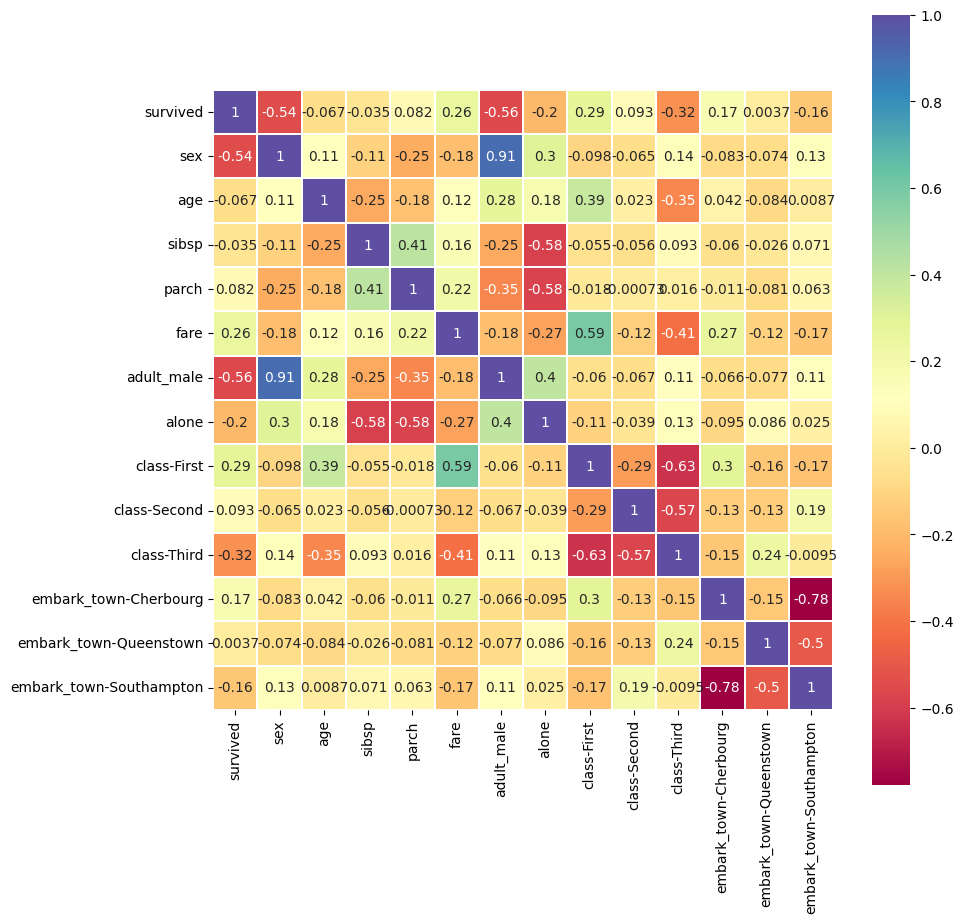

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),linewidths=0.1, square=True,  linecolor='white', annot=True, cmap='Spectral')
plt.show()
plt.close()

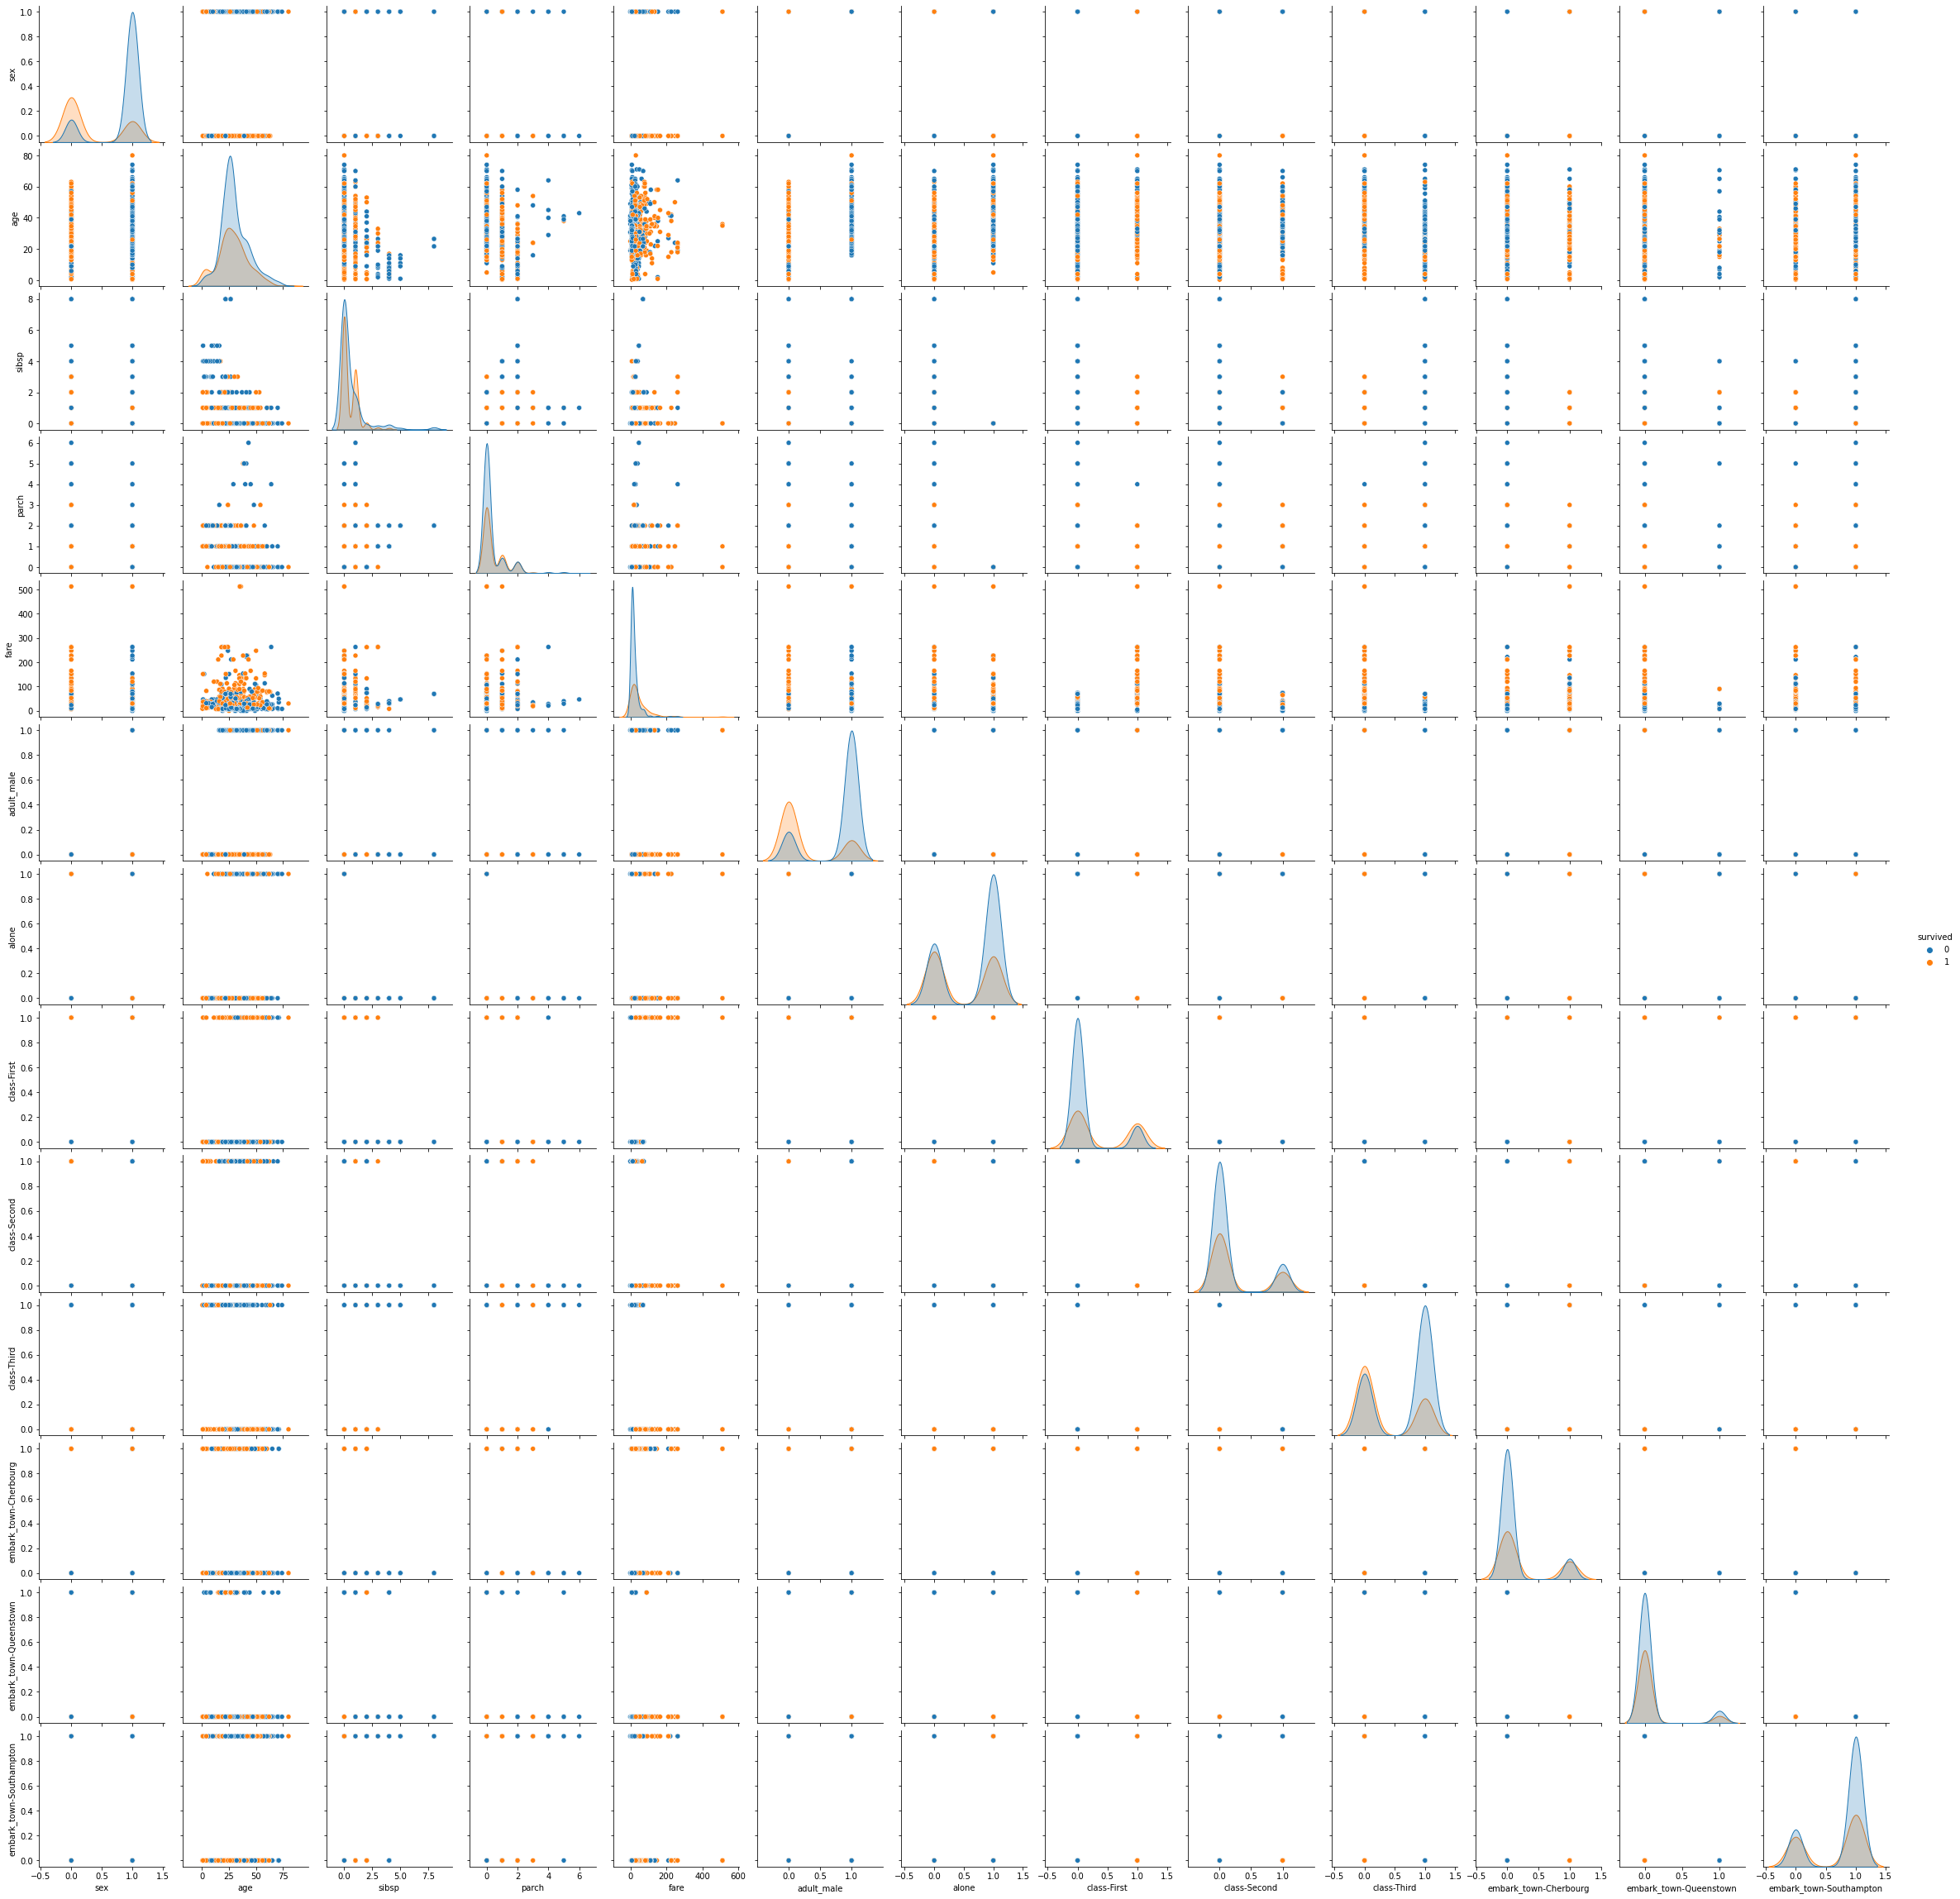

In [ ]:
sns.pairplot(data=X, hue='survived')
plt.show()

In [ ]:
# definimos la variable a predecir
y = X.pop("survived")
print('Tamaño X',X.shape)
print('Tamaño y',y.shape)

Tamaño X (891, 13)
Tamaño y (891,)


In [ ]:
# SEPARAMOS DATASET EN CJTO ENTRENAMIENTO Y TEST 75/25,

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 16, stratify=y)

criterio='entropy'
# criterio='gini'
arbol=DecisionTreeClassifier(criterion=criterio, random_state = 16)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=16)

[0.01224088 0.19803566 0.01949595 0.0183786  0.29998082 0.26157938
 0.01923198 0.02899504 0.00516261 0.10874618 0.01755904 0.01059385
 0.        ]


<Axes: ylabel='None'>

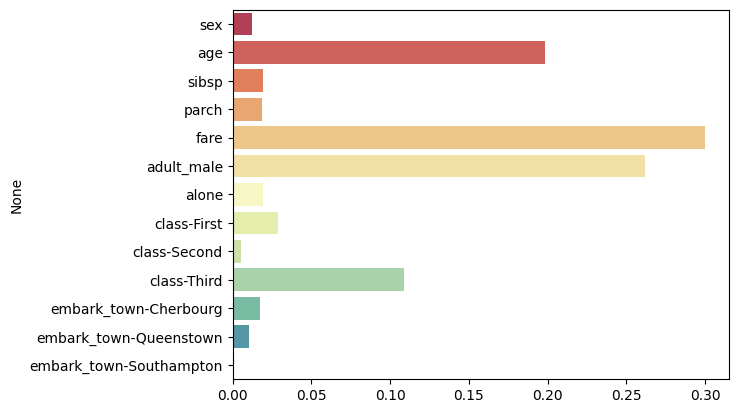

In [ ]:
#%%    VEMOS QUÉ VARIABLES PESARON MÁS EN LAS DECISIONES DEL ÁRBOL
fi=arbol.feature_importances_
print(fi)
sns.barplot(y = X_train.columns, x = fi, palette='Spectral')

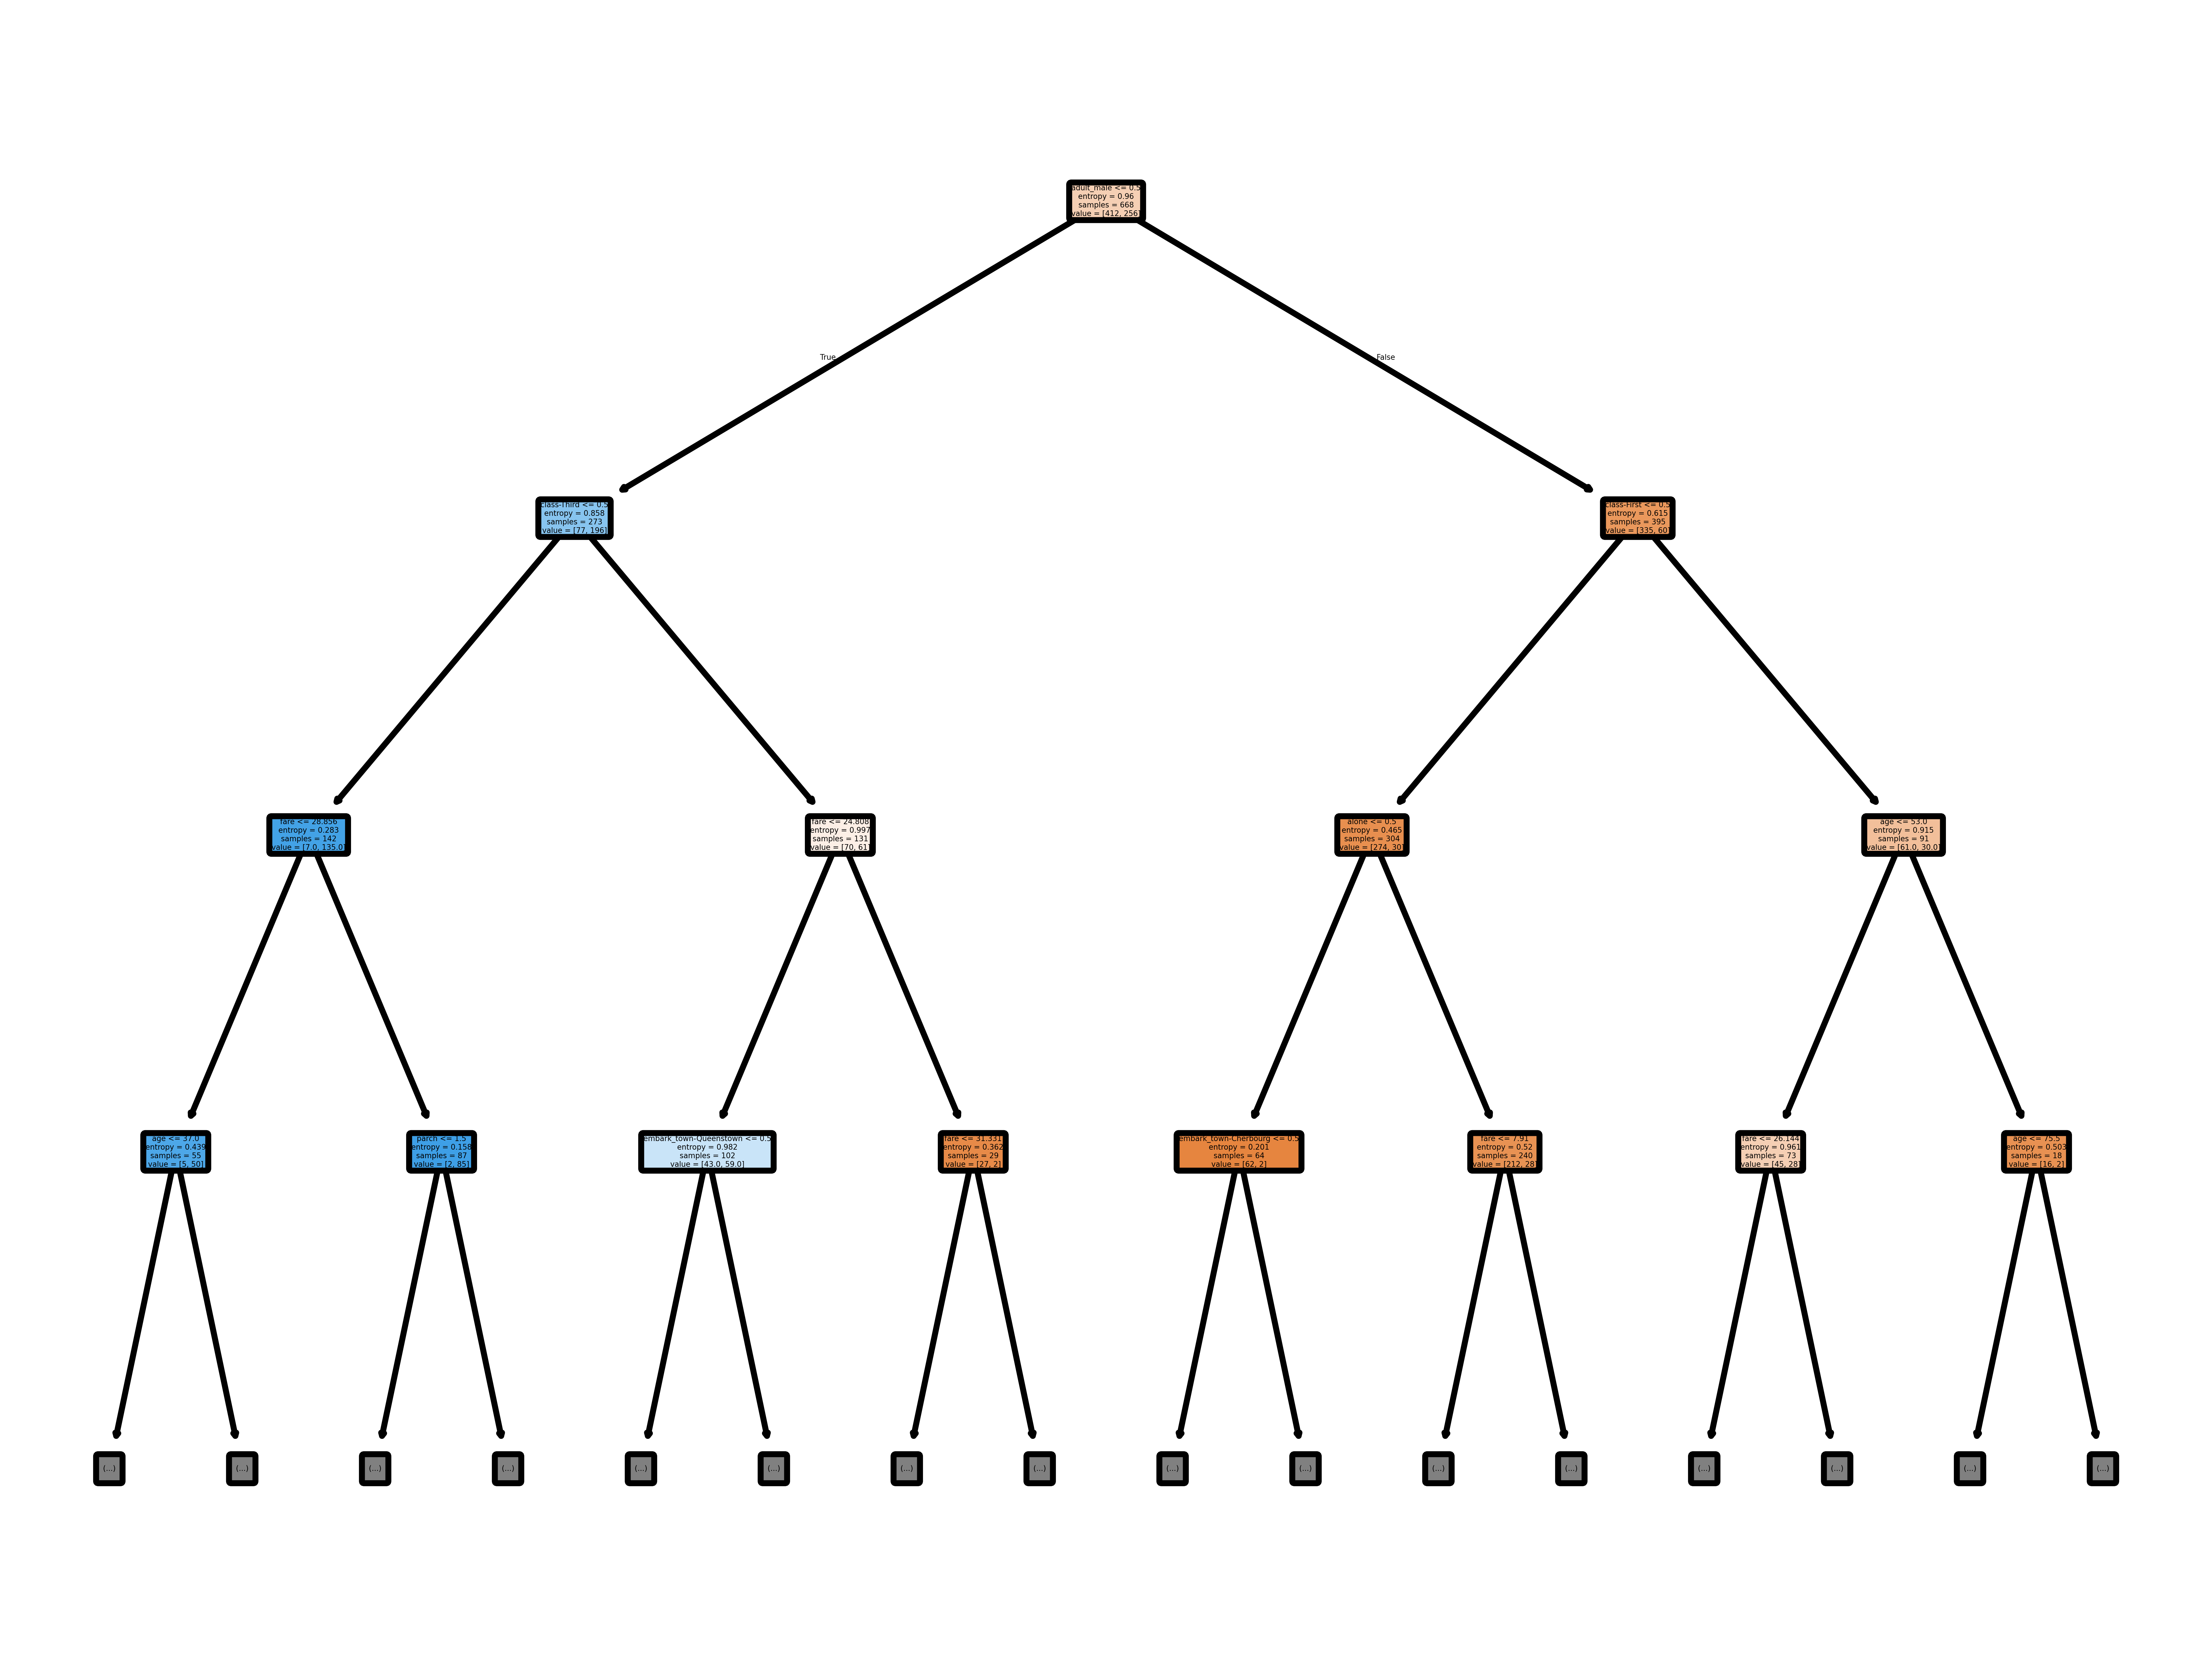

In [27]:
#%%   GRÁFICO DEL ÁRBOL
# plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None,
# label='all', filled=False, impurity=True, node_ids=False, proportion=False, rounded=False,
# precision=3, ax=None, fontsize=None)

list_features=list(X.columns)
plt.figure(dpi=1500)
plot_tree(arbol, filled=True, rounded=True, feature_names=list_features, max_depth=3)
plt.show()
plt.close()

In [28]:
#%%    HACEMOS PREDICCIONES Y VEMOS SCORE
y_pred = arbol.predict(X_test)
print('Score train: ', arbol.score(X_train, y_train))
print('Score test:  ', arbol.score(X_test, y_test))

# Se ve claramente que el árbol está sobrejustando

Score train:  0.9925149700598802
Score test:   0.8071748878923767


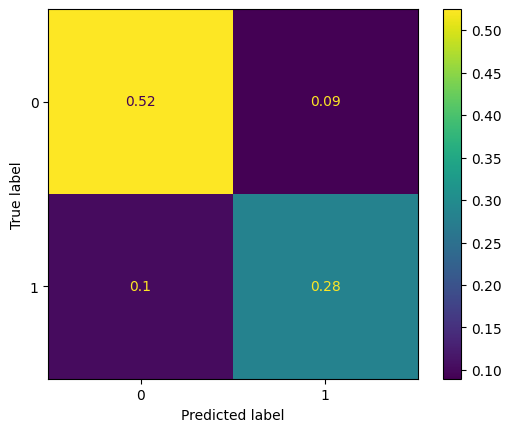

In [29]:
#%%    MATRIZ DE CONFUSION PARA VER MEJOR EL RENDIMIENTO DEL MODELO
cm = confusion_matrix(y_test, y_pred, normalize='all')
ConfusionMatrixDisplay(cm).plot()

In [ ]:
list_features

['sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'adult_male',
 'alone',
 'class-First',
 'class-Second',
 'class-Third',
 'embark_town-Cherbourg',
 'embark_town-Queenstown',
 'embark_town-Southampton']

In [31]:
'''  Y LEO DI CAPRIO? QUÉ DICE EL MODELO QUE LE DEBIÓ SUCEDER?
features = ['sex', 'age', 'sibsp', 'parch','fare', 'adult_male', 'alone', 'class-First',
 'class-Second', 'class-Third', 'embark_town-Cherbourg', 'embark_town-Queenstown',
 'embark_town-Southampton'] '''
leo = {'sex': [1], 'age': [23],'sibsp':[0], 'parch':[0], 'fare':[0.], 'adult_male': [1], 'alone':[0],
       'class-First':[0],'class-Second':[0], 'class-Third': [1], 'embark_town-Cherbourg':[0],
       'embark_town-Queenstown':[0],'embark_town-Southampton':[1]}
leo1 = pd.DataFrame.from_dict(leo)
print('Leo sobrevivió, Árbol? ', arbol.predict(leo1))

# Y Rose? qué fue de ella?
ros = {'sex': [0], 'age': [23],'sibsp':[0], 'parch':[1], 'fare':[70.], 'adult_male': [0], 'alone':[0],
       'class-First':[1],'class-Second':[0], 'class-Third': [0], 'embark_town-Cherbourg':[0],
       'embark_town-Queenstown':[0],'embark_town-Southampton':[1]}
rose = pd.DataFrame.from_dict(ros)
print(f'Rose sobrevivió, Árbol? {arbol.predict(rose)}')




Leo sobrevivió, Árbol?  [0]
Rose sobrevivió, Árbol? [1]


In [32]:
# A ver qué podemos hacer para combatir el sobreajuste...
# Varias estrategias: poner una profundidad máxima, fijar la cantidad de muestras máxima en la hoja y podar
# Veamos la primera
# Preguntamos cuál fue la profundidad máxima del árbol que entrenamos
print(f'Máxima profundidad: {arbol.get_depth()}')    # 20
print(f'Cantidad de hojas: {arbol.get_n_leaves()}')  # 153

depth=[i+1 for i in range(20)]
scor_train=[]
scor_test=[]
for dep in depth:
    tree=DecisionTreeClassifier(criterion=criterio, max_depth=dep, random_state = 16)
    tree.fit(X_train, y_train)
    pred=tree.predict(X_test)
    '''
    print(f'Profundidad: {dep}')
    print(f'Precisión train: {tree.score(X_train, y_train)}')
    print(f'Precisión test: {tree.score(X_test, y_test)}')
    '''
    scor_train.append(tree.score(X_train, y_train))
    scor_test.append(tree.score(X_test, y_test))


Máxima profundidad: 20
Cantidad de hojas: 153


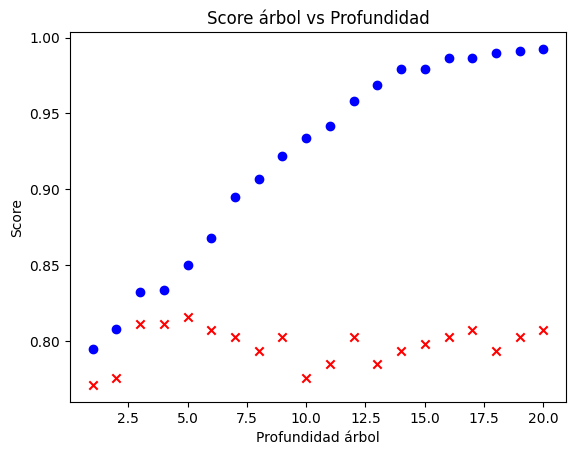

In [33]:
plt.figure()
plt.scatter(x=depth, y=scor_train, marker='o', color='blue')
plt.scatter(x=depth, y=scor_test, marker='x', color='red')
plt.title('Score árbol vs Profundidad')
plt.xlabel('Profundidad árbol')
plt.ylabel('Score')
plt.show()
plt.close()

In [34]:
# Otro criterio es regular la cantidad de muestras mínima en cada hoja
samplex=[i+1 for i in range(20)]
scor_train1=[]
scor_test1=[]
for sam in samplex:
    tree=DecisionTreeClassifier(criterion=criterio, min_samples_leaf=sam, random_state = 16)
    tree.fit(X_train, y_train)
    pred=tree.predict(X_test)
    '''
    print(f'Profundidad: {sam}')
    print(f'Precisión train: {tree.score(X_train, y_train)}')
    print(f'Precisión test: {tree.score(X_test, y_test)}')
    '''
    scor_train1.append(tree.score(X_train, y_train))
    scor_test1.append(tree.score(X_test, y_test))

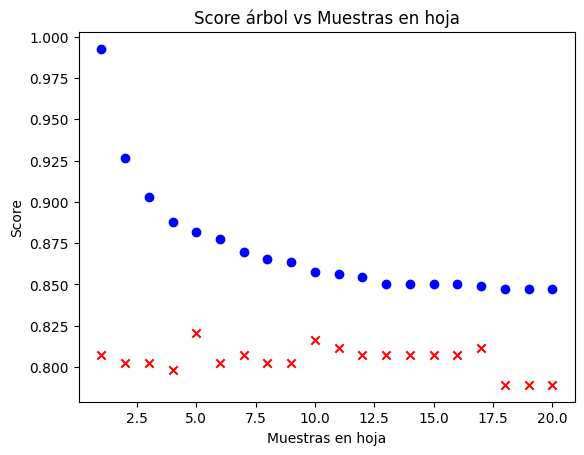

In [35]:
plt.figure()
plt.scatter(x=samplex, y=scor_train1, marker='o', color='blue')
plt.scatter(x=samplex, y=scor_test1, marker='x', color='red')
plt.title('Score árbol vs Muestras en hoja')
plt.xlabel('Muestras en hoja')
plt.ylabel('Score')
plt.show()
plt.close()

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

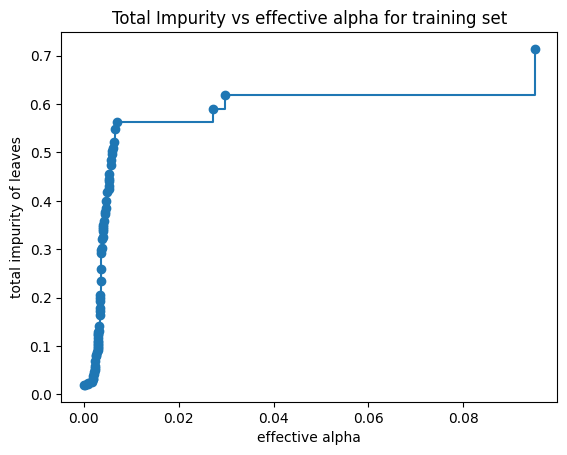

In [36]:
# Poda posterior
clas = DecisionTreeClassifier(criterion=criterio, random_state=16)
path = clas.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
ccp_alphas

array([0.00000000e+00, 5.34644996e-05, 7.48502994e-05, 6.23752495e-04,
       6.23752495e-04, 6.73652695e-04, 6.98602794e-04, 7.28805547e-04,
       8.98203593e-04, 9.16349120e-04, 9.85979848e-04, 9.98003992e-04,
       1.12275449e-03, 1.12275449e-03, 1.19760479e-03, 1.22482308e-03,
       1.24750499e-03, 1.25375681e-03, 1.29740519e-03, 1.30659733e-03,
       1.30988024e-03, 1.30988024e-03, 1.33067199e-03, 1.33067199e-03,
       1.36228518e-03, 1.39376420e-03, 1.40894681e-03, 1.44621434e-03,
       1.45164217e-03, 1.45920281e-03, 1.49281869e-03, 1.53977759e-03,
       1.55907964e-03, 1.68361274e-03, 1.78214999e-03, 1.87949252e-03,
       1.93363273e-03, 1.98353293e-03, 2.03847624e-03, 2.06483585e-03,
       2.12907518e-03, 2.12907518e-03, 2.16067148e-03, 2.24550898e-03,
       2.26819089e-03, 2.44261553e-03, 2.56629598e-03, 2.68511838e-03,
       3.65700088e-03, 3.76611911e-03, 3.82091853e-03, 1.11877609e-02,
       1.75473110e-02, 4.79991074e-02, 1.54862540e-01])

In [ ]:
impurities

array([0.00905332, 0.00910679, 0.00918164, 0.01042914, 0.01105289,
       0.01172655, 0.01242515, 0.01534037, 0.01623858, 0.01898762,
       0.02194556, 0.02394157, 0.02955534, 0.03180085, 0.03419606,
       0.03909535, 0.04159036, 0.05036666, 0.05555628, 0.06078267,
       0.06340243, 0.06602219, 0.06868354, 0.07134488, 0.07951859,
       0.08509365, 0.08791154, 0.09080397, 0.09370725, 0.09662566,
       0.0996113 , 0.10269085, 0.11828165, 0.14016862, 0.14195077,
       0.14758924, 0.15339014, 0.15735721, 0.15939568, 0.16559019,
       0.16771927, 0.16984834, 0.17416968, 0.17641519, 0.18095157,
       0.2004925 , 0.20305879, 0.21111415, 0.21842815, 0.23349263,
       0.24113447, 0.25232223, 0.26986954, 0.31786864, 0.47273118])

In [37]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion=criterio, random_state=16, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.24614292978864827


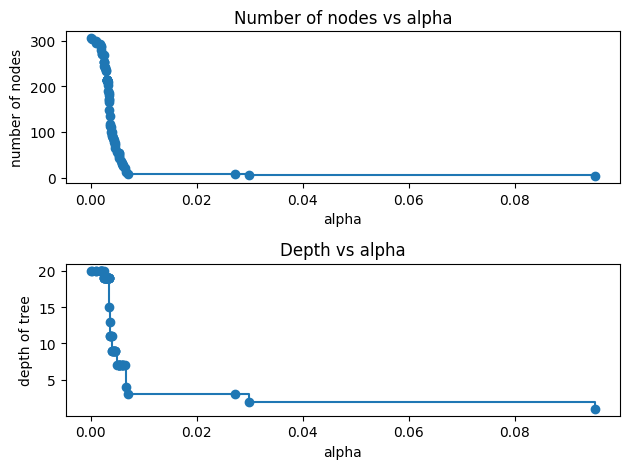

In [38]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


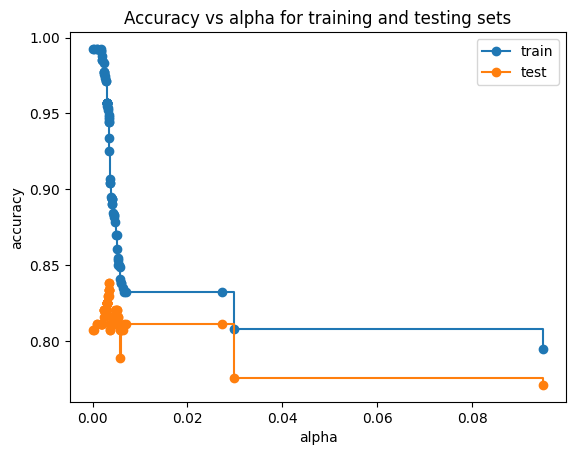

In [39]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [42]:
alfas=ccp_alphas
scor=np.array(test_scores)
tscor=np.array(train_scores)
dif=tscor-scor

alfa_score=pd.DataFrame({'alpha':alfas, 'score':scor, 'tscor':tscor, 'dif':dif})
indice=alfa_score['dif'].idxmin()
alfa_best=alfa_score['alpha'].iloc[indice]
print('Mejor alfa', alfa_best)
alfa_score.head(15)

Mejor alfa 0.006614098893799138


,alpha,score,tscor,dif
0,0.000000,0.807175,0.992515,0.185340
1,0.000310,0.807175,0.992515,0.185340
2,0.000932,0.811659,0.992515,0.180856
3,0.000963,0.811659,0.992515,0.180856
4,0.001763,0.811659,0.992515,0.180856
5,0.001848,0.811659,0.991018,0.179359
6,0.001864,0.811659,0.991018,0.179359
7,0.001996,0.811659,0.988024,0.176365
8,0.002062,0.811659,0.985030,0.173371
9,0.002062,0.811659,0.985030,0.173371


In [43]:
alfas=ccp_alphas
sco=np.array(test_scores)
score=np.array(train_scores)
alfa_scores=pd.DataFrame({'alpha':alfas, 'score_test':sco, 'score_train':score})
alfa_scores['diferencia']= alfa_scores['score_train'] - alfa_scores['score_test']
index=alfa_scores['diferencia'].idxmin()
alfa_best=alfa_scores['alpha'].iloc[index]
print('Mejor alfa', alfa_best)
alfa_scores

Mejor alfa 0.006614098893799138


,alpha,score_test,score_train,diferencia
0,0.000000,0.807175,0.992515,0.185340
1,0.000310,0.807175,0.992515,0.185340
2,0.000932,0.811659,0.992515,0.180856
3,0.000963,0.811659,0.992515,0.180856
4,0.001763,0.811659,0.992515,0.180856
...,...,...,...,...
64,0.006614,0.811659,0.832335,0.020676
65,0.007002,0.811659,0.832335,0.020676
66,0.027284,0.811659,0.832335,0.020676
67,0.029749,0.775785,0.808383,0.032598


Score train:  0.8323353293413174
Score test:   0.8116591928251121


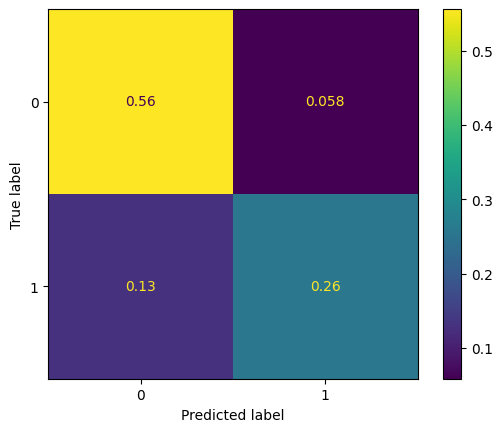

In [44]:
# veamos cómo se porta con el mejor valor de alfa que encontramos, la profundidad y las muestras x hoja
arbol_alfa=DecisionTreeClassifier(criterion=criterio, random_state = 16, ccp_alpha=alfa_best) #max_depth=5, min_samples_leaf=5)   #,ccp_alpha=alfa_best , class_weight='balanced')
arbol_alfa.fit(X_train, y_train)
y_pred_alfa = arbol_alfa.predict(X_test)
print('Score train: ', arbol_alfa.score(X_train, y_train))
print('Score test:  ', arbol_alfa.score(X_test, y_test))
cm_alfa = confusion_matrix(y_test, y_pred_alfa, normalize='all')
ConfusionMatrixDisplay(cm_alfa).plot()
